## Regression Coefficients are affected by regularisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Read Data

In [2]:
data = pd.read_csv('../DoHBrwTest.csv')
data.shape

(53860, 35)

In [3]:
data.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,is_intrusion
0,7.0,2.0,52742,443,18355.0,0.046455,55,1183.941449,66,1420.729738,...,1.000000,0.000000,0.000000,0.046455,0.046455,0.046455,-10.000000,-10.000000,0.000000,0
1,7.0,2.0,54640,443,18365.0,96.750105,42044,434.562836,44920,464.288902,...,0.561877,0.001700,0.041234,0.033549,0.026931,0.026952,0.481463,0.159978,1.229096,0
2,7.0,2.0,56611,443,18373.0,96.365606,41539,431.056284,44577,462.582054,...,0.549156,0.000956,0.030926,0.026551,0.026848,0.026879,-0.028834,-0.010614,1.164778,0
3,7.0,2.0,56611,443,18374.0,121.356820,60659,499.840058,67897,559.482360,...,0.556570,0.001013,0.031829,0.027571,0.026862,0.026941,0.066819,0.019791,1.154439,0
4,7.0,2.0,56611,443,18375.0,104.669253,30409,290.524668,30718,293.476825,...,0.331633,0.001226,0.035013,0.029797,0.026867,0.026908,0.251063,0.082517,1.175049,0


### Train - Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['is_intrusion'], axis=1),
    data['is_intrusion'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((37702, 34), (16158, 34))

Fitting a few logistic regression models with decreasing values for the penalty of the regularisation

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

coefs_df = []

# we train 4 different models with regularization
penalties = [0.00005, 0.0005, 0.005, 0.05, 0.5]

for c in penalties:   
    
    logit = LogisticRegression(C=c, penalty='l2', random_state=10, max_iter=300)
    logit.fit(scaler.transform(X_train), y_train)
    
    # store the coefficients of the variables in a list
    coefs_df.append(pd.Series(logit.coef_.ravel()))

In [6]:
# Create a dataframe with the coefficients for all
# the variables for the 4 different logistic regression models

coefs = pd.concat(coefs_df, axis=1)
coefs.columns = penalties
coefs.index = X_train.columns
coefs.head(15)

,0.00005,0.00050,0.00500,0.05000,0.50000
SourceIP,0.089060,0.301763,0.475041,0.590937,0.937550
DestinationIP,0.022467,0.089390,0.143450,0.250843,0.704178
SourcePort,-0.032808,-0.135058,-0.315563,-0.771600,-1.552411
DestinationPort,0.025335,0.080244,0.038330,-0.291573,-1.054238
TimeStamp,0.222628,0.991784,2.466920,4.976135,10.300426
Duration,0.059734,0.236472,0.493795,0.815140,1.193254
FlowBytesSent,0.035224,0.131037,0.276353,0.479967,0.801618
FlowSentRate,-0.030528,-0.045349,-0.063623,-0.081543,-0.048962
FlowBytesReceived,0.038854,0.176628,0.413486,0.601896,0.635767
FlowReceivedRate,-0.032272,-0.059247,-0.103016,-0.147397,-0.170735


In [7]:
# apply log scale to the penalties (simplifies comparison)

coefs.columns = np.log(penalties)
coefs.head(15)

,-9.903488,-7.600902,-5.298317,-2.995732,-0.693147
SourceIP,0.089060,0.301763,0.475041,0.590937,0.937550
DestinationIP,0.022467,0.089390,0.143450,0.250843,0.704178
SourcePort,-0.032808,-0.135058,-0.315563,-0.771600,-1.552411
DestinationPort,0.025335,0.080244,0.038330,-0.291573,-1.054238
TimeStamp,0.222628,0.991784,2.466920,4.976135,10.300426
Duration,0.059734,0.236472,0.493795,0.815140,1.193254
FlowBytesSent,0.035224,0.131037,0.276353,0.479967,0.801618
FlowSentRate,-0.030528,-0.045349,-0.063623,-0.081543,-0.048962
FlowBytesReceived,0.038854,0.176628,0.413486,0.601896,0.635767
FlowReceivedRate,-0.032272,-0.059247,-0.103016,-0.147397,-0.170735


Text(0.5, 1.0, 'Coefficient value vs penalty. Each line corresponds to one variable')

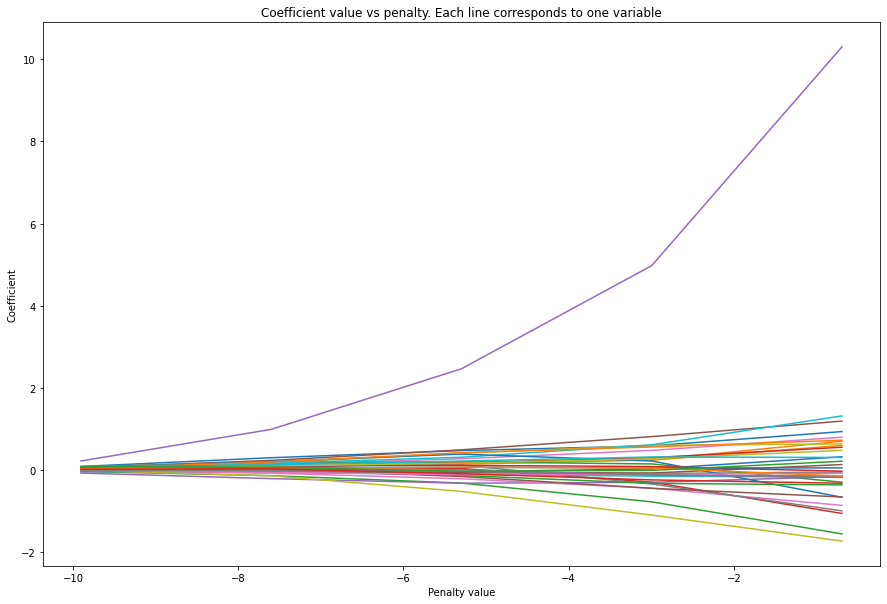

In [8]:
# plot the change in coefficients with the penalty
coefs.T.plot(figsize=(15,10), legend=False)
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty. Each line corresponds to one variable')

Text(0.5, 1.0, 'Coefficient value vs penalty')

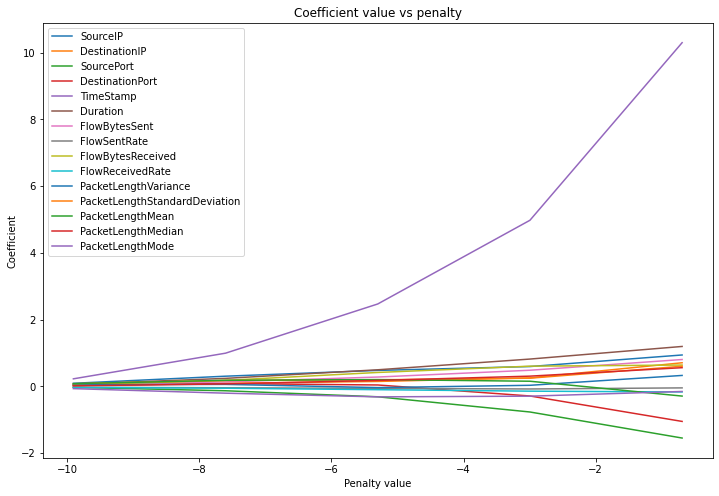

In [9]:
# now I will plot only the first 10 features for better visualisation

temp = coefs.head(15)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

Text(0.5, 1.0, 'Coefficient value vs penalty')

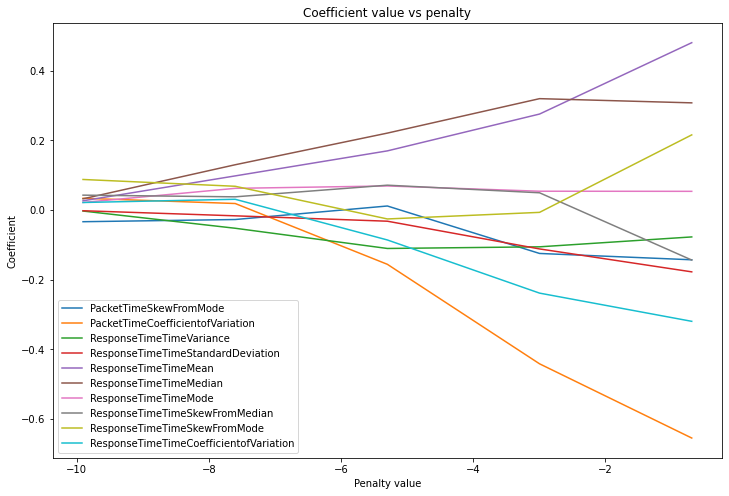

In [10]:
# plot another 10 features for visualisation
temp = coefs.tail(10)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

The relationship between features, as inferred from the coefficients, changes depending on the level of regularisation.

In [11]:
coefs.head(15).T.columns

Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'TimeStamp', 'Duration', 'FlowBytesSent', 'FlowSentRate',
       'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode'],
      dtype='object')

In [12]:
X_train = X_train[coefs.head(15).T.columns]
X_test = X_test[coefs.head(15).T.columns]

In [13]:
X_train.shape, X_test.shape

((37702, 15), (16158, 15))

## Standardize Data




In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

## Classifiers





In [15]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

## Metrics Evaluation




In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Logistic Regression




In [17]:
%%time
clf_LR = linear_model.LogisticRegression(n_jobs=-1, random_state=42, C=0.1).fit(X_train, y_train)

CPU times: user 70.4 ms, sys: 174 ms, total: 244 ms
Wall time: 1.86 s


In [18]:
pred_y_test = clf_LR.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_test))

f1 = f1_score(y_test, pred_y_test)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_test)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.4263147449890851
F1 Score: 0.5967975898237001
FPR: 0.9967392915369794
TPR: 0.9141953679172721


### Naive Bayes





In [19]:
%%time
clf_NB = GaussianNB(var_smoothing=1e-09).fit(X_train, y_train)

CPU times: user 29.3 ms, sys: 8.47 ms, total: 37.8 ms
Wall time: 35.9 ms


In [20]:
pred_y_testNB = clf_NB.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testNB))

f1 = f1_score(y_test, pred_y_testNB)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testNB)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.46441754316332606
F1 Score: 0.6342692974848223
FPR: 1.0
TPR: 1.0


### Random Forest





In [21]:
%%time
clf_RF = RandomForestClassifier(random_state=0,max_depth=70,n_estimators=100).fit(X_train, y_train)

CPU times: user 3.53 s, sys: 51.2 ms, total: 3.58 s
Wall time: 3.58 s


In [22]:
pred_y_testRF = clf_RF.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testRF))

f1 = f1_score(y_test, pred_y_testRF, average='weighted', zero_division=0)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testRF)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.5423695177614606
F1 Score: 0.3888423634800173
FPR: 0.00022232103156958648
TPR: 0.014870523886847278


### KNN




In [23]:
%%time
clf_KNN = KNeighborsClassifier(algorithm='brute',leaf_size=1,n_neighbors=2,weights='distance').fit(X_train, y_train)

CPU times: user 7.35 ms, sys: 1.43 ms, total: 8.78 ms
Wall time: 6.93 ms


In [24]:
pred_y_testKNN = clf_KNN.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, pred_y_testKNN))

f1 = f1_score(y_test, pred_y_testKNN)
print('f1:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testKNN)
print('fpr:', fpr[1])
print('tpr:', tpr[1])

accuracy_score: 0.4627108553284382
f1: 0.6310740468209195
fpr: 0.9940714391581443
tpr: 0.9894880779420563


### CatBoost






In [25]:
%%time
clf_CB = CatBoostClassifier(random_state=0,depth=7,iterations=50,learning_rate=0.04).fit(X_train, y_train)

0:	learn: 0.6580853	total: 64.8ms	remaining: 3.17s
1:	learn: 0.6245317	total: 72.4ms	remaining: 1.74s
2:	learn: 0.5934713	total: 79.4ms	remaining: 1.24s
3:	learn: 0.5651455	total: 86.9ms	remaining: 1000ms
4:	learn: 0.5393416	total: 93.8ms	remaining: 844ms
5:	learn: 0.5143997	total: 101ms	remaining: 739ms
6:	learn: 0.4922639	total: 108ms	remaining: 665ms
7:	learn: 0.4706885	total: 115ms	remaining: 606ms
8:	learn: 0.4506488	total: 122ms	remaining: 558ms
9:	learn: 0.4315928	total: 130ms	remaining: 520ms
10:	learn: 0.4138217	total: 138ms	remaining: 488ms
11:	learn: 0.3970630	total: 145ms	remaining: 460ms
12:	learn: 0.3814302	total: 153ms	remaining: 435ms
13:	learn: 0.3664439	total: 161ms	remaining: 415ms
14:	learn: 0.3523773	total: 168ms	remaining: 392ms
15:	learn: 0.3382372	total: 175ms	remaining: 372ms
16:	learn: 0.3250235	total: 182ms	remaining: 353ms
17:	learn: 0.3134981	total: 190ms	remaining: 337ms
18:	learn: 0.3022795	total: 196ms	remaining: 320ms
19:	learn: 0.2918550	total: 204ms	r

In [26]:
pred_y_testCB = clf_CB.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testCB))

f1 = f1_score(y_test, pred_y_testCB, average='weighted', zero_division=0)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testCB)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.5355824568366739
F1 Score: 0.3736022989766641
FPR: 1.0
TPR: 1.0


## Model Evaluation





In [27]:
import pandas as pd, numpy as np
test_df = pd.read_csv("../KDDTest.csv")
test_df.shape

(22543, 42)

In [28]:
# Create feature matrix X and target vextor y
y_eval = test_df['is_intrusion']
X_eval = test_df.drop(columns=['is_intrusion'])

In [29]:
X_eval = X_eval[coefs.head(15).T.columns]

In [30]:
X_eval.shape

(22543, 15)

### Model Evaluation - Logistic Regression




In [31]:
modelLR = linear_model.LogisticRegression(n_jobs=-1, random_state=42, C=0.1)
modelLR.fit(X_train, y_train)

LogisticRegression(C=0.1, n_jobs=-1, random_state=42)

In [32]:
# Predict on the new unseen test data
y_evalpredLR = modelLR.predict(X_eval)
y_predLR = modelLR.predict(X_test)

In [33]:
train_scoreLR = modelLR.score(X_train, y_train)
test_scoreLR = modelLR.score(X_test, y_test)
print("Training accuracy is ", train_scoreLR)
print("Testing accuracy is ", test_scoreLR)

Training accuracy is  0.913859313136926
Testing accuracy is  0.4263147449890851


In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreLR)
print('F1 Score:',f1_score(y_test, y_predLR))
print('Precision Score:',precision_score(y_test, y_predLR))
print('Recall Score:', recall_score(y_test, y_predLR))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predLR))

Performance measures for test:
--------
Accuracy: 0.4263147449890851
F1 Score: 0.5967975898237001
Precision Score: 0.44299498902555184
Recall Score: 0.9141953679172721
Confusion Matrix:
 [[   44 13450]
 [ 1004 10697]]


### Cross validation - Logistic Regression




In [35]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.84181 (+/- 0.05232)
F1 Score: 0.85941 (+/- 0.05340)
Precision: 0.86565 (+/- 0.01023)
Recall: 0.85457 (+/- 0.10107)


### Model Evaluation - Naive Bayes




In [36]:
modelNB = GaussianNB(var_smoothing=1e-09)
modelNB.fit(X_train, y_train)

GaussianNB()

In [37]:
# Predict on the new unseen test data
y_evalpredNB = modelNB.predict(X_eval)
y_predNB = modelNB.predict(X_test)

In [38]:
train_scoreNB = modelNB.score(X_train, y_train)
test_scoreNB = modelNB.score(X_test, y_test)
print("Training accuracy is ", train_scoreNB)
print("Testing accuracy is ", test_scoreNB)

Training accuracy is  0.5935084394256626
Testing accuracy is  0.46441754316332606


In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreNB)
print('F1 Score:',f1_score(y_test, y_predNB))
print('Precision Score:',precision_score(y_test, y_predNB))
print('Recall Score:', recall_score(y_test, y_predNB))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predNB))

Performance measures for test:
--------
Accuracy: 0.46441754316332606
F1 Score: 0.6342692974848223
Precision Score: 0.46441754316332606
Recall Score: 1.0
Confusion Matrix:
 [[    0 13494]
 [    0 11701]]


### Cross validation - Naive Bayes




In [40]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.67698 (+/- 0.16192)
F1 Score: 0.63819 (+/- 0.33514)
Precision: 0.84911 (+/- 0.16773)
Recall: 0.56369 (+/- 0.43112)


### Model Evaluation - Random Forest





In [41]:
modelRF = RandomForestClassifier(random_state=0,max_depth=70,n_estimators=100)
modelRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, random_state=0)

In [42]:
# Predict on the new unseen test data
y_evalpredRF = modelRF.predict(X_eval)
y_predRF = modelRF.predict(X_test)

In [43]:
train_scoreRF = modelRF.score(X_train, y_train)
test_scoreRF = modelRF.score(X_test, y_test)
print("Training accuracy is ", train_scoreRF)
print("Testing accuracy is ", test_scoreRF)

Training accuracy is  0.9943637933258581
Testing accuracy is  0.5423695177614606


In [44]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreRF)
print('F1 Score:', f1_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Precision Score:', precision_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Recall Score:', recall_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predRF))

Performance measures for test:
--------
Accuracy: 0.5423695177614606
F1 Score: 0.3888423634800173
Precision Score: 0.7453598304730532
Recall Score: 0.5423695177614606
Confusion Matrix:
 [[13491     3]
 [11527   174]]


### Cross validation - Random Forest





In [45]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.98297 (+/- 0.00428)
F1 Score: 0.98506 (+/- 0.00371)
Precision: 0.98400 (+/- 0.00849)
Recall: 0.98613 (+/- 0.00521)


### Model Evaluation - KNN


In [46]:
modelKNN = KNeighborsClassifier(algorithm='brute',leaf_size=1,n_neighbors=2,weights='distance')
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=1, n_neighbors=2,
                     weights='distance')

In [47]:
# Predict on the new unseen test data
y_evalpredKNN = modelKNN.predict(X_eval)
y_predKNN = modelKNN.predict(X_test)

In [48]:
train_scoreKNN = modelKNN.score(X_train, y_train)
test_scoreKNN = modelKNN.score(X_test, y_test)
print("Training accuracy is ", train_scoreKNN)
print("Testing accuracy is ", test_scoreKNN)

Training accuracy is  0.9858301001220516
Testing accuracy is  0.4627108553284382


In [49]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreKNN)
print('F1 Score:', f1_score(y_test, y_predKNN))
print('Precision Score:', precision_score(y_test, y_predKNN))
print('Recall Score:', recall_score(y_test, y_predKNN))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predKNN))

Performance measures for test:
--------
Accuracy: 0.4627108553284382
F1 Score: 0.6310740468209195
Precision Score: 0.4632682458386684
Recall Score: 0.9894880779420563
Confusion Matrix:
 [[   80 13414]
 [  123 11578]]


### Cross validation - KNN





In [50]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.97037 (+/- 0.00392)
F1 Score: 0.97371 (+/- 0.00352)
Precision: 0.98341 (+/- 0.00754)
Recall: 0.96423 (+/- 0.00863)


### Model Evaluation - CatBoost




In [51]:
modelCB = CatBoostClassifier(random_state=0,depth=7,iterations=50,learning_rate=0.04)
modelCB.fit(X_train, y_train)

0:	learn: 0.6580853	total: 8.12ms	remaining: 398ms
1:	learn: 0.6245317	total: 15.3ms	remaining: 366ms
2:	learn: 0.5934713	total: 22.2ms	remaining: 349ms
3:	learn: 0.5651455	total: 31.7ms	remaining: 365ms
4:	learn: 0.5393416	total: 38.5ms	remaining: 346ms
5:	learn: 0.5143997	total: 46.1ms	remaining: 338ms
6:	learn: 0.4922639	total: 54.3ms	remaining: 333ms
7:	learn: 0.4706885	total: 61.5ms	remaining: 323ms
8:	learn: 0.4506488	total: 69.2ms	remaining: 315ms
9:	learn: 0.4315928	total: 76.7ms	remaining: 307ms
10:	learn: 0.4138217	total: 83.7ms	remaining: 297ms
11:	learn: 0.3970630	total: 90.7ms	remaining: 287ms
12:	learn: 0.3814302	total: 97.8ms	remaining: 278ms
13:	learn: 0.3664439	total: 105ms	remaining: 270ms
14:	learn: 0.3523773	total: 112ms	remaining: 261ms
15:	learn: 0.3382372	total: 119ms	remaining: 252ms
16:	learn: 0.3250235	total: 125ms	remaining: 243ms
17:	learn: 0.3134981	total: 133ms	remaining: 236ms
18:	learn: 0.3022795	total: 140ms	remaining: 228ms
19:	learn: 0.2918550	total: 

In [52]:
# Predict on the new unseen test data
y_evalpredCB = modelCB.predict(X_eval)
y_predCB = modelCB.predict(X_test)

In [53]:
train_scoreCB = modelCB.score(X_train, y_train)
test_scoreCB = modelCB.score(X_test, y_test)
print("Training accuracy is ", train_scoreCB)
print("Testing accuracy is ", test_scoreCB)

Training accuracy is  0.9842523591692549
Testing accuracy is  0.5355824568366739


In [54]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreCB)
print('F1 Score:',f1_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Precision Score:',precision_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Recall Score:', recall_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predCB))

Performance measures for test:
--------
Accuracy: 0.5355824568366739
F1 Score: 0.3736022989766641
Precision Score: 0.28684856807120773
Recall Score: 0.5355824568366739
Confusion Matrix:
 [[13494     0]
 [11701     0]]


### Cross validation - CatBoost





In [55]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='accuracy')
f = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='f1')
precision = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='precision')
recall = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='recall')

0:	learn: 0.6604636	total: 3.99ms	remaining: 196ms
1:	learn: 0.6316012	total: 8.53ms	remaining: 205ms
2:	learn: 0.6041264	total: 12.8ms	remaining: 201ms
3:	learn: 0.5781526	total: 17.6ms	remaining: 202ms
4:	learn: 0.5542021	total: 21.6ms	remaining: 194ms
5:	learn: 0.5325835	total: 25.6ms	remaining: 187ms
6:	learn: 0.5120416	total: 29.7ms	remaining: 182ms
7:	learn: 0.4927279	total: 33.8ms	remaining: 178ms
8:	learn: 0.4737866	total: 38ms	remaining: 173ms
9:	learn: 0.4561869	total: 42.3ms	remaining: 169ms
10:	learn: 0.4395249	total: 46.1ms	remaining: 163ms
11:	learn: 0.4241717	total: 50ms	remaining: 158ms
12:	learn: 0.4091610	total: 53.9ms	remaining: 154ms
13:	learn: 0.3949304	total: 57.9ms	remaining: 149ms
14:	learn: 0.3818776	total: 62.1ms	remaining: 145ms
15:	learn: 0.3696590	total: 66.3ms	remaining: 141ms
16:	learn: 0.3575260	total: 70.3ms	remaining: 136ms
17:	learn: 0.3462495	total: 74.4ms	remaining: 132ms
18:	learn: 0.3357463	total: 78.7ms	remaining: 128ms
19:	learn: 0.3255423	total

24:	learn: 0.2850967	total: 101ms	remaining: 101ms
25:	learn: 0.2775362	total: 105ms	remaining: 97ms
26:	learn: 0.2699020	total: 109ms	remaining: 92.8ms
27:	learn: 0.2630666	total: 113ms	remaining: 88.7ms
28:	learn: 0.2559633	total: 117ms	remaining: 84.6ms
29:	learn: 0.2491922	total: 121ms	remaining: 80.5ms
30:	learn: 0.2427578	total: 125ms	remaining: 76.4ms
31:	learn: 0.2364572	total: 129ms	remaining: 72.3ms
32:	learn: 0.2301661	total: 133ms	remaining: 68.3ms
33:	learn: 0.2248030	total: 137ms	remaining: 64.4ms
34:	learn: 0.2201264	total: 141ms	remaining: 60.5ms
35:	learn: 0.2146291	total: 145ms	remaining: 56.4ms
36:	learn: 0.2095478	total: 149ms	remaining: 52.4ms
37:	learn: 0.2049685	total: 153ms	remaining: 48.4ms
38:	learn: 0.2006512	total: 157ms	remaining: 44.4ms
39:	learn: 0.1966284	total: 162ms	remaining: 40.4ms
40:	learn: 0.1923151	total: 166ms	remaining: 36.4ms
41:	learn: 0.1882161	total: 170ms	remaining: 32.3ms
42:	learn: 0.1838744	total: 174ms	remaining: 28.3ms
43:	learn: 0.18

33:	learn: 0.2228633	total: 137ms	remaining: 64.3ms
34:	learn: 0.2174728	total: 141ms	remaining: 60.3ms
35:	learn: 0.2122526	total: 144ms	remaining: 56.2ms
36:	learn: 0.2073734	total: 148ms	remaining: 52.1ms
37:	learn: 0.2026524	total: 152ms	remaining: 48.1ms
38:	learn: 0.1985442	total: 156ms	remaining: 44ms
39:	learn: 0.1943907	total: 160ms	remaining: 40ms
40:	learn: 0.1903948	total: 164ms	remaining: 36ms
41:	learn: 0.1863827	total: 168ms	remaining: 32ms
42:	learn: 0.1824811	total: 172ms	remaining: 28ms
43:	learn: 0.1791753	total: 176ms	remaining: 24ms
44:	learn: 0.1758910	total: 180ms	remaining: 20ms
45:	learn: 0.1727657	total: 184ms	remaining: 16ms
46:	learn: 0.1696968	total: 188ms	remaining: 12ms
47:	learn: 0.1665920	total: 192ms	remaining: 7.98ms
48:	learn: 0.1634381	total: 195ms	remaining: 3.99ms
49:	learn: 0.1607380	total: 199ms	remaining: 0us
0:	learn: 0.6603949	total: 4.29ms	remaining: 210ms
1:	learn: 0.6317364	total: 8.65ms	remaining: 208ms
2:	learn: 0.6042700	total: 12.7ms	r

3:	learn: 0.5781526	total: 18.1ms	remaining: 209ms
4:	learn: 0.5542021	total: 22.3ms	remaining: 201ms
5:	learn: 0.5325835	total: 26.5ms	remaining: 194ms
6:	learn: 0.5120416	total: 30.5ms	remaining: 187ms
7:	learn: 0.4927279	total: 34.3ms	remaining: 180ms
8:	learn: 0.4737866	total: 38.1ms	remaining: 174ms
9:	learn: 0.4561869	total: 42.2ms	remaining: 169ms
10:	learn: 0.4395249	total: 46.1ms	remaining: 163ms
11:	learn: 0.4241717	total: 50.1ms	remaining: 159ms
12:	learn: 0.4091610	total: 54.3ms	remaining: 155ms
13:	learn: 0.3949304	total: 58.3ms	remaining: 150ms
14:	learn: 0.3818776	total: 62.1ms	remaining: 145ms
15:	learn: 0.3696590	total: 66.2ms	remaining: 141ms
16:	learn: 0.3575260	total: 70.3ms	remaining: 137ms
17:	learn: 0.3462495	total: 74.5ms	remaining: 132ms
18:	learn: 0.3357463	total: 78.4ms	remaining: 128ms
19:	learn: 0.3255423	total: 82.5ms	remaining: 124ms
20:	learn: 0.3157109	total: 86.5ms	remaining: 119ms
21:	learn: 0.3062109	total: 90.5ms	remaining: 115ms
22:	learn: 0.297199

33:	learn: 0.2248030	total: 139ms	remaining: 65.4ms
34:	learn: 0.2201264	total: 143ms	remaining: 61.3ms
35:	learn: 0.2146291	total: 147ms	remaining: 57.2ms
36:	learn: 0.2095478	total: 151ms	remaining: 53ms
37:	learn: 0.2049685	total: 155ms	remaining: 48.8ms
38:	learn: 0.2006512	total: 158ms	remaining: 44.7ms
39:	learn: 0.1966284	total: 162ms	remaining: 40.5ms
40:	learn: 0.1923151	total: 167ms	remaining: 36.6ms
41:	learn: 0.1882161	total: 171ms	remaining: 32.5ms
42:	learn: 0.1838744	total: 175ms	remaining: 28.5ms
43:	learn: 0.1800905	total: 179ms	remaining: 24.4ms
44:	learn: 0.1766561	total: 183ms	remaining: 20.4ms
45:	learn: 0.1734303	total: 187ms	remaining: 16.3ms
46:	learn: 0.1698423	total: 191ms	remaining: 12.2ms
47:	learn: 0.1669751	total: 195ms	remaining: 8.14ms
48:	learn: 0.1640294	total: 200ms	remaining: 4.07ms
49:	learn: 0.1611708	total: 204ms	remaining: 0us
0:	learn: 0.6605541	total: 4.02ms	remaining: 197ms
1:	learn: 0.6318705	total: 8.06ms	remaining: 193ms
2:	learn: 0.6048499

0:	learn: 0.6603949	total: 4.13ms	remaining: 203ms
1:	learn: 0.6317364	total: 8.11ms	remaining: 195ms
2:	learn: 0.6042700	total: 12.3ms	remaining: 192ms
3:	learn: 0.5779170	total: 16.2ms	remaining: 187ms
4:	learn: 0.5539252	total: 20.3ms	remaining: 182ms
5:	learn: 0.5327356	total: 24.4ms	remaining: 179ms
6:	learn: 0.5122770	total: 28.4ms	remaining: 175ms
7:	learn: 0.4922947	total: 32.8ms	remaining: 172ms
8:	learn: 0.4733295	total: 37.1ms	remaining: 169ms
9:	learn: 0.4556129	total: 41.2ms	remaining: 165ms
10:	learn: 0.4397655	total: 45.3ms	remaining: 161ms
11:	learn: 0.4245426	total: 49.8ms	remaining: 158ms
12:	learn: 0.4098572	total: 54ms	remaining: 154ms
13:	learn: 0.3965645	total: 58ms	remaining: 149ms
14:	learn: 0.3834595	total: 62ms	remaining: 145ms
15:	learn: 0.3704527	total: 66.1ms	remaining: 140ms
16:	learn: 0.3585684	total: 70.4ms	remaining: 137ms
17:	learn: 0.3472253	total: 74.5ms	remaining: 133ms
18:	learn: 0.3367215	total: 78.6ms	remaining: 128ms
19:	learn: 0.3265025	total: 

23:	learn: 0.2888122	total: 99.1ms	remaining: 107ms
24:	learn: 0.2808276	total: 103ms	remaining: 103ms
25:	learn: 0.2731578	total: 107ms	remaining: 98.9ms
26:	learn: 0.2656336	total: 111ms	remaining: 94.6ms
27:	learn: 0.2587643	total: 115ms	remaining: 90.3ms
28:	learn: 0.2518469	total: 119ms	remaining: 86.2ms
29:	learn: 0.2452063	total: 123ms	remaining: 81.9ms
30:	learn: 0.2388387	total: 127ms	remaining: 77.7ms
31:	learn: 0.2330227	total: 131ms	remaining: 73.7ms
32:	learn: 0.2277093	total: 135ms	remaining: 69.8ms
33:	learn: 0.2225468	total: 140ms	remaining: 65.7ms
34:	learn: 0.2176955	total: 144ms	remaining: 61.7ms
35:	learn: 0.2125589	total: 148ms	remaining: 57.5ms
36:	learn: 0.2075811	total: 152ms	remaining: 53.4ms
37:	learn: 0.2032026	total: 156ms	remaining: 49.3ms
38:	learn: 0.1986308	total: 160ms	remaining: 45.1ms
39:	learn: 0.1947829	total: 164ms	remaining: 41ms
40:	learn: 0.1904670	total: 168ms	remaining: 36.9ms
41:	learn: 0.1864411	total: 172ms	remaining: 32.8ms
42:	learn: 0.18

49:	learn: 0.1611708	total: 203ms	remaining: 0us
0:	learn: 0.6605541	total: 4.36ms	remaining: 213ms
1:	learn: 0.6318705	total: 8.58ms	remaining: 206ms
2:	learn: 0.6048499	total: 12.6ms	remaining: 198ms
3:	learn: 0.5786271	total: 17.3ms	remaining: 199ms
4:	learn: 0.5548124	total: 21.6ms	remaining: 194ms
5:	learn: 0.5335291	total: 25.7ms	remaining: 189ms
6:	learn: 0.5123562	total: 29.6ms	remaining: 182ms
7:	learn: 0.4932585	total: 33.5ms	remaining: 176ms
8:	learn: 0.4743517	total: 37.6ms	remaining: 171ms
9:	learn: 0.4570295	total: 41.7ms	remaining: 167ms
10:	learn: 0.4398410	total: 45.8ms	remaining: 162ms
11:	learn: 0.4247698	total: 49.9ms	remaining: 158ms
12:	learn: 0.4097999	total: 54ms	remaining: 154ms
13:	learn: 0.3955583	total: 57.9ms	remaining: 149ms
14:	learn: 0.3824276	total: 62.1ms	remaining: 145ms
15:	learn: 0.3704428	total: 66.3ms	remaining: 141ms
16:	learn: 0.3582290	total: 70.7ms	remaining: 137ms
17:	learn: 0.3465806	total: 74.8ms	remaining: 133ms
18:	learn: 0.3355838	total:

19:	learn: 0.3265025	total: 79.5ms	remaining: 119ms
20:	learn: 0.3163780	total: 83.4ms	remaining: 115ms
21:	learn: 0.3068502	total: 87.4ms	remaining: 111ms
22:	learn: 0.2974520	total: 91.7ms	remaining: 108ms
23:	learn: 0.2890992	total: 95.6ms	remaining: 104ms
24:	learn: 0.2809940	total: 99.4ms	remaining: 99.4ms
25:	learn: 0.2730728	total: 103ms	remaining: 95.4ms
26:	learn: 0.2656201	total: 107ms	remaining: 91.2ms
27:	learn: 0.2581943	total: 111ms	remaining: 87ms
28:	learn: 0.2512187	total: 115ms	remaining: 83.2ms
29:	learn: 0.2444481	total: 119ms	remaining: 79.3ms
30:	learn: 0.2382533	total: 123ms	remaining: 75.3ms
31:	learn: 0.2322531	total: 127ms	remaining: 71.5ms
32:	learn: 0.2262732	total: 131ms	remaining: 67.5ms
33:	learn: 0.2206992	total: 135ms	remaining: 63.7ms
34:	learn: 0.2160250	total: 139ms	remaining: 59.7ms
35:	learn: 0.2110137	total: 143ms	remaining: 55.8ms
36:	learn: 0.2060605	total: 147ms	remaining: 51.8ms
37:	learn: 0.2016664	total: 151ms	remaining: 47.8ms
38:	learn: 0.

47:	learn: 0.1666654	total: 197ms	remaining: 8.2ms
48:	learn: 0.1637130	total: 201ms	remaining: 4.1ms
49:	learn: 0.1608643	total: 205ms	remaining: 0us
0:	learn: 0.6604845	total: 3.89ms	remaining: 190ms
1:	learn: 0.6314676	total: 7.9ms	remaining: 190ms
2:	learn: 0.6042620	total: 11.8ms	remaining: 185ms
3:	learn: 0.5784070	total: 16ms	remaining: 183ms
4:	learn: 0.5545470	total: 20.1ms	remaining: 181ms
5:	learn: 0.5333174	total: 24.5ms	remaining: 180ms
6:	learn: 0.5130005	total: 28.6ms	remaining: 175ms
7:	learn: 0.4941216	total: 32.7ms	remaining: 172ms
8:	learn: 0.4751092	total: 37.1ms	remaining: 169ms
9:	learn: 0.4577354	total: 41.2ms	remaining: 165ms
10:	learn: 0.4419735	total: 45.1ms	remaining: 160ms
11:	learn: 0.4266248	total: 49.1ms	remaining: 155ms
12:	learn: 0.4118234	total: 53.2ms	remaining: 151ms
13:	learn: 0.3978676	total: 57.2ms	remaining: 147ms
14:	learn: 0.3846226	total: 61.3ms	remaining: 143ms
15:	learn: 0.3726118	total: 65.4ms	remaining: 139ms
16:	learn: 0.3603930	total: 69

15:	learn: 0.3704428	total: 64.7ms	remaining: 137ms
16:	learn: 0.3582290	total: 68.7ms	remaining: 133ms
17:	learn: 0.3465806	total: 72.6ms	remaining: 129ms
18:	learn: 0.3355838	total: 76.5ms	remaining: 125ms
19:	learn: 0.3255224	total: 80.5ms	remaining: 121ms
20:	learn: 0.3157726	total: 84.5ms	remaining: 117ms
21:	learn: 0.3059493	total: 88.3ms	remaining: 112ms
22:	learn: 0.2968213	total: 92.9ms	remaining: 109ms
23:	learn: 0.2885718	total: 97ms	remaining: 105ms
24:	learn: 0.2805231	total: 101ms	remaining: 101ms
25:	learn: 0.2729259	total: 105ms	remaining: 97.1ms
26:	learn: 0.2656203	total: 109ms	remaining: 93.1ms
27:	learn: 0.2587742	total: 113ms	remaining: 89.1ms
28:	learn: 0.2518350	total: 118ms	remaining: 85.1ms
29:	learn: 0.2452619	total: 122ms	remaining: 81ms
30:	learn: 0.2388615	total: 126ms	remaining: 77.3ms
31:	learn: 0.2326454	total: 130ms	remaining: 73.4ms
32:	learn: 0.2266143	total: 135ms	remaining: 69.3ms
33:	learn: 0.2209583	total: 139ms	remaining: 65.3ms
34:	learn: 0.2163

39:	learn: 0.1933263	total: 165ms	remaining: 41.1ms
40:	learn: 0.1891527	total: 169ms	remaining: 37ms
41:	learn: 0.1855691	total: 173ms	remaining: 32.9ms
42:	learn: 0.1821309	total: 176ms	remaining: 28.7ms
43:	learn: 0.1784978	total: 180ms	remaining: 24.6ms
44:	learn: 0.1749657	total: 184ms	remaining: 20.5ms
45:	learn: 0.1713780	total: 188ms	remaining: 16.4ms
46:	learn: 0.1680698	total: 193ms	remaining: 12.3ms
47:	learn: 0.1652225	total: 197ms	remaining: 8.22ms
48:	learn: 0.1625034	total: 202ms	remaining: 4.11ms
49:	learn: 0.1596564	total: 206ms	remaining: 0us
0:	learn: 0.6625173	total: 3.97ms	remaining: 194ms
1:	learn: 0.6334459	total: 8.1ms	remaining: 195ms
2:	learn: 0.6051233	total: 12.6ms	remaining: 197ms
3:	learn: 0.5789908	total: 16.9ms	remaining: 194ms
4:	learn: 0.5551723	total: 21ms	remaining: 189ms
5:	learn: 0.5340042	total: 25.8ms	remaining: 189ms
6:	learn: 0.5135301	total: 29.9ms	remaining: 184ms
7:	learn: 0.4948921	total: 34.6ms	remaining: 181ms
8:	learn: 0.4765075	total: 3

In [56]:
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.96615 (+/- 0.00554)
F1 Score: 0.97042 (+/- 0.00485)
Precision: 0.96546 (+/- 0.00647)
Recall: 0.97545 (+/- 0.00729)
